In [105]:
# Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline


In [93]:
# Load the Amazon Dataset

df = pd.read_csv("/Users/radhamahesh/Desktop/AI-ML Materials/ratings_Electronics.csv")


df.head()


df.describe(include="all")

#shape of the data
df.shape

#datatype of each fields in the dataset
df.info()

#missing values check in the dataset
df.isna().apply(pd.value_counts)

df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   AKM1MP6P0OYPR  object 
 1   0132793040     object 
 2   5.0            float64
 3   1365811200     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [7]:
df.shape

(7824481, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   AKM1MP6P0OYPR  object 
 1   0132793040     object 
 2   5.0            float64
 3   1365811200     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [14]:
# Assigning the name of the columns
df.columns = ["UserID", "ProductID", "Rating", "Timestamp"]

In [15]:
# Checking for unique UserID and ProductID
Total_users = len(df["UserID"].unique())
Total_product = len(df["ProductID"].unique())

In [16]:
print("Number of users :", Total_users)
print("Number of product :", Total_product)

Number of users : 4201696
Number of product : 476001


In [17]:
# Checking the presence of null value
print ('Number of missing value across columns :\n',df.isnull().sum())
# Dataset does not have any missing value

Number of missing value across columns :
 UserID       0
ProductID    0
Rating       0
Timestamp    0
dtype: int64


In [18]:
# Checking the summary of the dataset
df.describe().transpose()
# "Rating" is left skewed, i.e. majority of the observations having lower ratings

,count,mean,std,min,25%,50%,75%,max
Rating,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


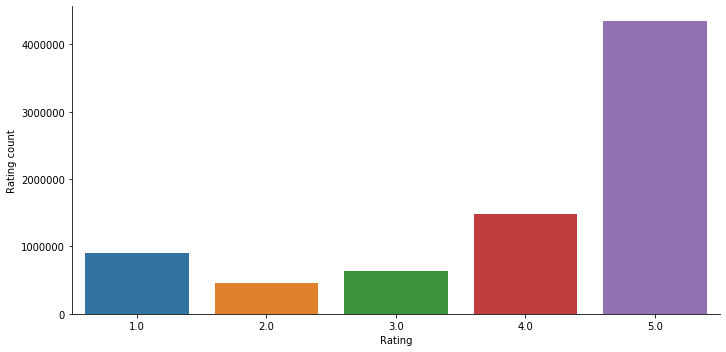

In [19]:
# Distribution of Ratings
d = sns.factorplot("Rating", data = df, kind = 'count', aspect = 2.0)
d.set_ylabels ("Rating count")

In [20]:
# Top product based on number of users
Top_product = df.groupby("ProductID").size().sort_values(ascending = False)[:10]
Top_product

ProductID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
dtype: int64

In [21]:
# Showing popular 10 product (% contribution)
product_grouped = df.groupby(['ProductID']).agg({'Rating': 'count'}).reset_index()
grouped_sum = product_grouped['Rating'].sum()
print(grouped_sum)
product_grouped['Percentage']  = product_grouped['Rating'].div(grouped_sum)*100
product_grouped.sort_values(['Rating', 'ProductID'], ascending = [0,1])[:10]

7824481


,ProductID,Rating,Percentage
308397,B0074BW614,18244,0.233166
429571,B00DR0PDNE,16454,0.210289
327307,B007WTAJTO,14172,0.181124
102803,B0019EHU8G,12285,0.157007
296624,B006GWO5WK,12226,0.156253
178600,B003ELYQGG,11617,0.148470
178812,B003ES5ZUU,10276,0.131331
323012,B007R5YDYA,9907,0.126615
289774,B00622AG6S,9823,0.125542
30275,B0002L5R78,9487,0.121248


In [22]:
sns.set(style="white", palette="tab10", color_codes=True)

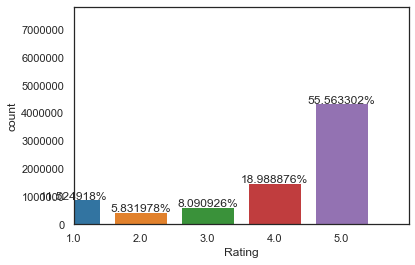

In [24]:
ax = sns.countplot(data=df,x='Rating');
ax.set_ylim(0, len(df))
ax.set_xlim(0, 5)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:%}'.format(height/float(len(df))),
            ha="center") 
plt.show();

In [29]:
# Top user based on number of rating they provided
Top_user = df.groupby("UserID").size().sort_values(ascending = False)[:10]
Top_user

UserID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [26]:
data_set_threshold50=df.groupby("ProductID").filter(lambda x:x['Rating'].count() >=50)


In [28]:
data_set_threshold50.groupby('ProductID')['Rating'].count().sort_values(ascending=False)

ProductID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B00DTMXQYI       50
B003MVZ8NI       50
B007FLQ8D0       50
B003LZRAFO       50
B009GGC4B2       50
Name: Rating, Length: 26226, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_set_threshold50, test_size = 0.3, random_state=0)
train_data.head()

,UserID,ProductID,Rating,Timestamp
154601,A15BHBF0L0HV1F,B000067RVL,5.0,1355788800
3405826,A3VVJIZXLL1QFP,B003KPBRRW,5.0,1358467200
1168364,AFHY3XJJ6NCAI,B000MM3EKY,5.0,1354492800
2673403,A2WPY1SNQPCC00,B002L0VNXK,5.0,1356912000
2175240,AJMJREC90WJVP,B001NJTZUS,4.0,1326067200


In [33]:
# We will consider the popularity of the product based on the user count i.e. how many users liked this particular product. 
# Higher the user count, more popular the product is.

train_data_grouped = train_data.groupby('ProductID').agg({'UserID': 'count'}).reset_index()
train_data_grouped.rename(columns = {'UserID': 'NoOfUsers'},inplace=True)
train_data_grouped.head()

,ProductID,NoOfUsers
0,0972683275,737
1,1400501466,178
2,1400501520,54
3,1400501776,93
4,1400532620,117


In [32]:
#Count no of user_id for each unique product as recommendation score 
train_data_grouped_rating= train_data.groupby(['ProductID'])['Rating'].sum().reset_index()
train_data_grouped_rating.rename(columns = {'Rating': 'ratingsum'},inplace=True)
train_data_grouped_rating.head()

,ProductID,ratingsum
0,0972683275,3297.0
1,1400501466,642.0
2,1400501520,232.0
3,1400501776,352.0
4,1400532620,429.0


In [34]:
train_data_sort = train_data_grouped.sort_values(['NoOfUsers', 'ProductID'], ascending = [0,1])

In [35]:
train_data_sort.head()

,ProductID,NoOfUsers
19245,B0074BW614,12760
25032,B00DR0PDNE,11573
20325,B007WTAJTO,9956
18581,B006GWO5WK,8541
6593,B0019EHU8G,8451


In [36]:
train_data_sort["Rank"]=train_data_sort['NoOfUsers'].rank(ascending=0, method='first')

In [37]:
train_data_sort.head()

,ProductID,NoOfUsers,Rank
19245,B0074BW614,12760,1.0
25032,B00DR0PDNE,11573,2.0
20325,B007WTAJTO,9956,3.0
18581,B006GWO5WK,8541,4.0
6593,B0019EHU8G,8451,5.0


In [38]:
popularity_recommendations = train_data_sort.head(10)
popularity_recommendations

,ProductID,NoOfUsers,Rank
19245,B0074BW614,12760,1.0
25032,B00DR0PDNE,11573,2.0
20325,B007WTAJTO,9956,3.0
18581,B006GWO5WK,8541,4.0
6593,B0019EHU8G,8451,5.0
11856,B003ELYQGG,8051,6.0
11875,B003ES5ZUU,7145,7.0
20101,B007R5YDYA,6878,8.0
18241,B00622AG6S,6871,9.0
1751,B0002L5R78,6617,10.0


In [39]:
#top five prouducts as per their avg rating
#Count of user_id for each unique product as recommendation score 
train_data_grouped_users = train_data.groupby('ProductID').agg({'UserID': 'count'}).reset_index()
train_data_grouped_users.rename(columns = {'UserID': 'NoOfUser'},inplace=True)
train_data_grouped_users.head()

,ProductID,NoOfUser
0,0972683275,737
1,1400501466,178
2,1400501520,54
3,1400501776,93
4,1400532620,117


In [40]:
# Making the prediction with popularity based recommendation system
def recommender (userid):
    user_recommendation = popularity_recommendations
    user_recommendation["UserID"]=userid
    cols = user_recommendation.columns.tolist()
    cols=cols[-1:] + cols [:-1]
    user_recommendation = user_recommendation[cols]
    return user_recommendation

In [42]:

user_list = [5,9] # Creation of object for list of users
for i in user_list :
    print ("Here is the recommendation for the user Number: %d\n" %(i))
    print(recommender(i))
    print("\n")

Here is the recommendation for the user Number: 5

       UserID   ProductID  NoOfUsers  Rank
19245       5  B0074BW614      12760   1.0
25032       5  B00DR0PDNE      11573   2.0
20325       5  B007WTAJTO       9956   3.0
18581       5  B006GWO5WK       8541   4.0
6593        5  B0019EHU8G       8451   5.0
11856       5  B003ELYQGG       8051   6.0
11875       5  B003ES5ZUU       7145   7.0
20101       5  B007R5YDYA       6878   8.0
18241       5  B00622AG6S       6871   9.0
1751        5  B0002L5R78       6617  10.0


Here is the recommendation for the user Number: 9

       UserID   ProductID  NoOfUsers  Rank
19245       9  B0074BW614      12760   1.0
25032       9  B00DR0PDNE      11573   2.0
20325       9  B007WTAJTO       9956   3.0
18581       9  B006GWO5WK       8541   4.0
6593        9  B0019EHU8G       8451   5.0
11856       9  B003ELYQGG       8051   6.0
11875       9  B003ES5ZUU       7145   7.0
20101       9  B007R5YDYA       6878   8.0
18241       9  B00622AG6S       6871

In [43]:
#top five prouducts as per their avg rating
#Count of user_id for each unique product as recommendation score 
train_data_grouped_users = train_data.groupby('ProductID').agg({'UserID': 'count'}).reset_index()
train_data_grouped_users.rename(columns = {'UserID': 'noofuser'},inplace=True)
train_data_grouped_users.head()

,ProductID,noofuser
0,0972683275,737
1,1400501466,178
2,1400501520,54
3,1400501776,93
4,1400532620,117


In [ ]:
#Since the popularity based recommendation system only based on the popularity i.e. 
#how many user actually liked / rated this product, this will give the top 5 or 10 (based on user selection) purely based 
#on the occurance / frequency of the product in the dataset. The top product might change if we have different dataset 
#and this model can't recommend the product based on individual's interest.

In [44]:
df.shape

(7824481, 4)

In [53]:
counts = df["UserID"].value_counts() 
df_final = df[df["UserID"].isin(counts[counts>=50].index)]

In [54]:
# Creation of product rating matrix
rating_matrix = df_final.pivot(index = "UserID", columns = "ProductID", values = "Rating").fillna(0)
print("Number of rows and columns in final rating matrix:", rating_matrix.shape)

Number of rows and columns in final rating matrix: (1540, 48190)


In [55]:
rating_matrix.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Preparation of Training and test dataset
train_data, test_data = train_test_split(df_final, test_size = 0.25, random_state=10) # Spliting the dataset in-ratio of 3:1
train_data.head()

,UserID,ProductID,Rating,Timestamp
4271971,A1RPTVW5VEOSI,B004MKNJAC,4.0,1369699200
986569,A3QQGPI3CTV9SX,B000H6AY6M,5.0,1201219200
507743,A3IJ4Z18FTIIP,B0002TPFTA,5.0,1328918400
7675724,A2C8I2RQ0WG940,B00G36G76Q,2.0,1384387200
3001602,AVBLGXSWRN666,B0031H39N4,4.0,1338595200


In [96]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (94403, 4)
Shape of testing data:  (31468, 4)


In [100]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_final.pivot(index = 'UserID', columns ='ProductID', values = 'Rating').fillna(0)
pivot_df.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (1540, 48190)


In [102]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
UserID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [103]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 5)

In [107]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[-0.01143896  0.00479454 -0.02098223  0.03450332 -0.02112691]
 [ 0.0010932  -0.00289408 -0.01076097 -0.02009915 -0.03863719]
 [-0.00185799  0.00598731  0.02924332 -0.03319807 -0.03354122]
 ...
 [-0.01852538  0.02433853 -0.01332978  0.1613707  -0.05949368]
 [ 0.00280289  0.00531726 -0.00677598 -0.00445708 -0.01348483]
 [-0.0079953  -0.00705956 -0.01215862  0.00249329 -0.00561029]]


In [108]:
print('Sigma: \n',sigma)

Sigma: 
 [ 98.21626326 100.38232831 107.7090351  119.69501814 182.29276718]


In [109]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 98.21626326   0.           0.           0.           0.        ]
 [  0.         100.38232831   0.           0.           0.        ]
 [  0.           0.         107.7090351    0.           0.        ]
 [  0.           0.           0.         119.69501814   0.        ]
 [  0.           0.           0.           0.         182.29276718]]


In [110]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-3.94244138e-04 -1.45770070e-04  8.17007542e-04 ...  1.81732180e-03
   4.43815320e-03  4.50134885e-04]
 [-2.46133917e-05  3.95806785e-04  3.17044169e-04 ...  1.27075475e-02
   6.41015944e-03  1.49863655e-03]
 [-8.81590303e-04 -1.31370545e-03 -4.21874643e-04 ...  1.37986535e-02
   4.52761832e-03 -1.09691626e-03]
 [ 4.58579287e-05  1.88881713e-04  9.00497985e-05 ...  3.32629345e-02
   1.31262740e-02  2.24988359e-03]
 [-2.02226218e-04 -2.59177123e-04 -6.62049181e-04 ... -1.02695130e-02
  -3.76431121e-03 -8.69030592e-04]]


In [111]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.003392,0.005101,0.003110,0.014036,0.004347,0.003235,0.002712,0.000683,0.014522,0.002892,...,0.000628,0.045273,0.004108,0.065339,0.004514,0.007016,0.002378,0.149812,0.056574,0.015333
1,0.002301,0.002763,0.004931,0.020029,0.009944,0.001969,0.011179,0.002130,0.010814,0.001776,...,0.000567,0.010756,0.002047,-0.011471,0.007097,-0.001310,0.003282,-0.027182,-0.011699,0.001592
2,-0.001665,-0.003039,0.002403,0.012232,0.006044,-0.002258,0.006311,0.002968,-0.004614,-0.001742,...,-0.000316,0.007457,-0.002645,-0.021967,0.016302,-0.002753,-0.000616,-0.018615,-0.011839,-0.006263
3,0.002522,0.003514,0.001841,0.007227,0.003489,0.002573,0.004060,-0.000115,0.009802,0.002169,...,0.000543,0.001348,0.002789,0.001661,-0.003795,0.000373,0.002574,-0.012402,-0.003682,0.004147
4,0.000647,0.000271,0.001764,0.011201,0.005150,0.000247,0.005291,0.001642,0.002863,0.000320,...,0.000091,0.000177,0.000035,-0.016592,0.007257,-0.001789,0.001092,-0.025153,-0.013190,-0.001824


In [113]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [114]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B007WTAJTO                  0.0          0.725106
B003ES5ZUU                  0.0          0.715791
B002V88HFE                  0.0          0.417883
B001TH7GUU                  0.0          0.382170
B000QUUFRW                  0.0          0.337131


In [115]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
B00829TIEK                  0.0          1.302235
B008DWCRQW                  0.0          1.176585
B004CLYEDC                  0.0          0.949749
B00829THK0                  0.0          0.934089
B002R5AM7C                  0.0          0.931231


In [118]:
# Actual ratings given by the users
rating_matrix.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Average ACTUAL rating for each item
rating_matrix.mean().head()

ProductID
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [120]:
# Predicted ratings 
preds_df.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.003392,0.005101,0.003110,0.014036,0.004347,0.003235,0.002712,0.000683,0.014522,0.002892,...,0.000628,0.045273,0.004108,0.065339,0.004514,0.007016,0.002378,0.149812,0.056574,0.015333
1,0.002301,0.002763,0.004931,0.020029,0.009944,0.001969,0.011179,0.002130,0.010814,0.001776,...,0.000567,0.010756,0.002047,-0.011471,0.007097,-0.001310,0.003282,-0.027182,-0.011699,0.001592
2,-0.001665,-0.003039,0.002403,0.012232,0.006044,-0.002258,0.006311,0.002968,-0.004614,-0.001742,...,-0.000316,0.007457,-0.002645,-0.021967,0.016302,-0.002753,-0.000616,-0.018615,-0.011839,-0.006263
3,0.002522,0.003514,0.001841,0.007227,0.003489,0.002573,0.004060,-0.000115,0.009802,0.002169,...,0.000543,0.001348,0.002789,0.001661,-0.003795,0.000373,0.002574,-0.012402,-0.003682,0.004147
4,0.000647,0.000271,0.001764,0.011201,0.005150,0.000247,0.005291,0.001642,0.002863,0.000320,...,0.000091,0.000177,0.000035,-0.016592,0.007257,-0.001789,0.001092,-0.025153,-0.013190,-0.001824


In [121]:
# Average PREDICTED rating for each item
preds_df.mean().head()

ProductID
0594451647    0.001500
0594481813    0.002123
0970407998    0.002615
0972683275    0.009778
1400501466    0.004628
dtype: float64

In [123]:
rmse_df = pd.concat([rating_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
ProductID,,,
0594451647,0.003247,0.001500,0
0594481813,0.001948,0.002123,1
0970407998,0.003247,0.002615,2
0972683275,0.012338,0.009778,3
1400501466,0.012987,0.004628,4


In [124]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00357 



In [125]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 9
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 9):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.113172
B003ES5ZUU                  0.0          0.934294
B000N99BBC                  0.0          0.908848
B004CLYEDC                  0.0          0.865157
B004CLYEFK                  0.0          0.818933


In [ ]:
#The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts,
#which may be not suitable to the user.The Popularity based model has recommended the same set of 5 products to both user id 5 and 9 
#but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.

#Model-based Collaborative Filtering is a personalised recommender system, 
#the recommendations are based on the past behavior of the user and it is not dependent on any additional information.